# 1. Standard Scaling

Standard scaling is a method of scaling the data such that the distribution of data is centred around 0,with a standard deviation of 1.This is done by subtracting the mean of the data from each data point and then dividing bu the standard deviation of the data. This is a very common method od scaling data, and is used in many machine learning algorithms.

The formula is as follows:

z = (x - μ) / σ

In [20]:
# import libraries 
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler,MaxAbsScaler



In [21]:
# make an example dataset
data = {
    'age': [25, 30, 35, 40, 45],
    'height': [165, 170, 175, 180, 185],  # Fixed the length
    'weight': [55, 60, 70, 75, 80]
}

# convert this data to pandas dataframe
df = pd.DataFrame(data)
df.head()






,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,70
3,40,180,75
4,45,185,80


In [19]:
# import the scalar
scalar = StandardScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.414214,-1.414214,-1.401826
1,-0.707107,-0.707107,-0.862662
2,0.000000,0.000000,0.215666
3,0.707107,0.707107,0.754829
4,1.414214,1.414214,1.293993


## Min-max scaler

In [22]:
# import the scalar
scalar = MinMaxScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.00,0.00,0.0
1,0.25,0.25,0.2
2,0.50,0.50,0.6
3,0.75,0.75,0.8
4,1.00,1.00,1.0


## **MaxABS Scaler**

In [23]:
# import the scalar
scalar = MaxAbsScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.555556,0.891892,0.6875
1,0.666667,0.918919,0.7500
2,0.777778,0.945946,0.8750
3,0.888889,0.972973,0.9375
4,1.000000,1.000000,1.0000


In [24]:
# import the scalar
from sklearn.preprocessing import RobustScaler


scalar = RobustScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.000000
1,-0.5,-0.5,-0.666667
2,0.0,0.0,0.000000
3,0.5,0.5,0.333333
4,1.0,1.0,0.666667


---
**Transformation**
---

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [27]:
# generate non-normal data (exponential distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<AxesSubplot: xlabel='values', ylabel='Count'>

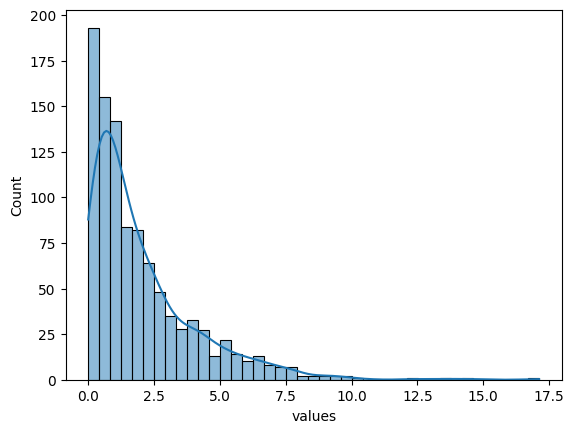

In [28]:
sns.histplot(df['values'], kde=True)

In [35]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
qt_normal = QuantileTransformer(output_distribution='normal')

# Note: for boxcox the data must be positive and does not contain anu negative values in it 

df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df["Quantile"] = qt_normal.fit_transform(df[['values']])

In [36]:
df.head()

,values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


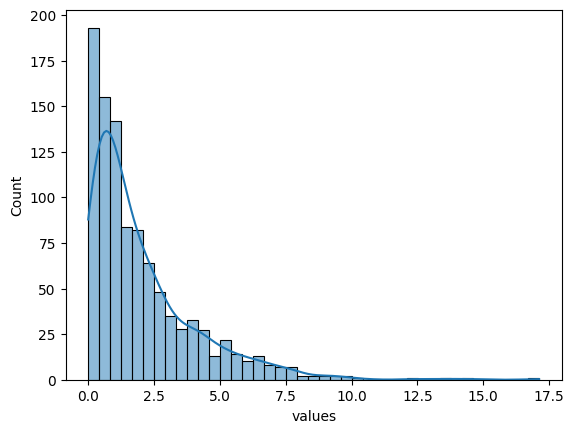

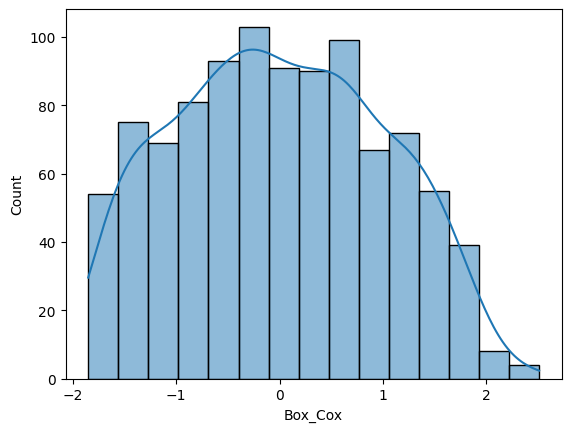

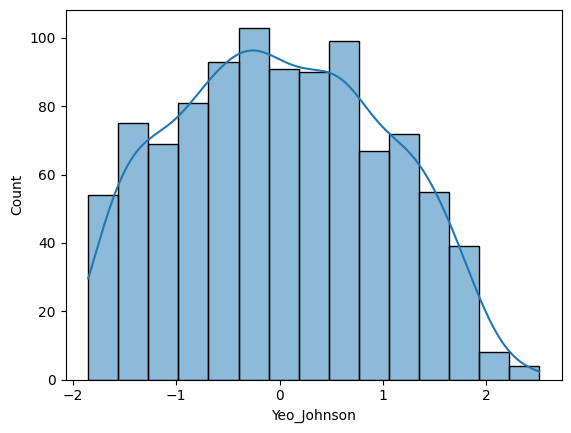

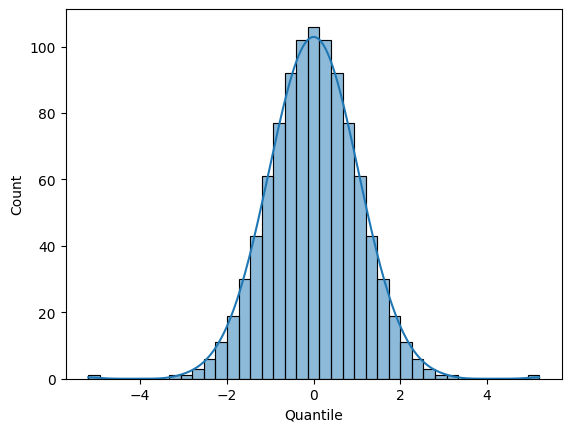

In [37]:
# create histograms for all columns using sns.hist and kde = true using a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

---
# **Normalization**

## what is Normalization?

Rescales each sample(row) to have unit norm. This type of normalization is often used when dealing with text data.
There are two ways of normalizing the data 
1. L2 Normalization
2. L1 Normalization

L2 norm is calculated as the square root of the sum of the squared vector values.

In [38]:
from sklearn.preprocessing import Normalizer
data = [[1,1,1], [1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


## L1 Normalization

Also rescales each sample(row) but with a different approach ,ensuring the sum of the absolute values is 1 in each row. The L1 norm is calculated as the sum of the absolute vector values. Example:


In [39]:
from sklearn.preprocessing import Normalizer
data = [[1,1,1], [1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


### The two more types of Normalization are as follows:
    1.Z-Score normalization 
        1. standard scaler
    2.Min-max normalization     
       1.Min-Max Scaler
        
    
    

## **Log Transformation**

In [43]:
import pandas as pd 
import numpy as np 

# example dataset with skewed values
df = {"Values": [1,5,10,20,24,35,56,67,78,89,90,2000,3000,4000,5000]}
df = pd.DataFrame(df)
df

,Values
0,1
1,5
2,10
3,20
4,24
5,35
6,56
7,67
8,78
9,89


<AxesSubplot: xlabel='Values', ylabel='Count'>

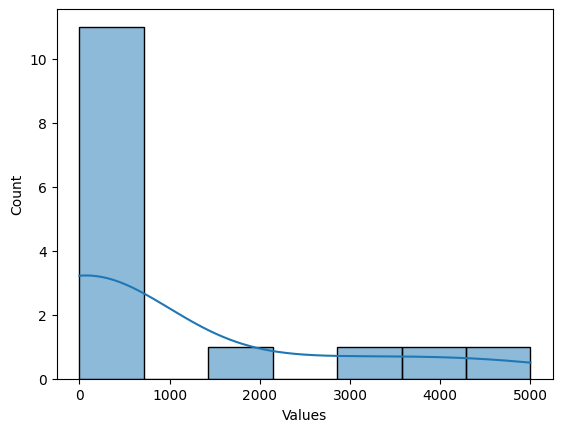

In [44]:
sns.histplot(df['Values'], kde=True)

In [46]:
# due to large values in the data the graph shows right skewness but we do not want this therefore we 
# use log transformation to reduce the skewness

df['log_values'] = np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,24,3.178054
5,35,3.555348
6,56,4.025352
7,67,4.204693
8,78,4.356709
9,89,4.488636


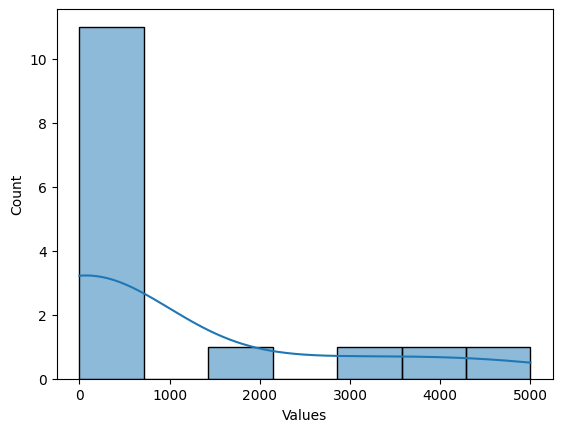

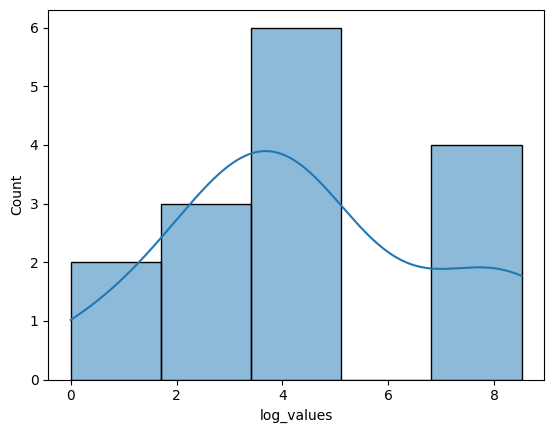

In [47]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()